# Credit Default Prediction - Machine Learning Models

This notebook goes through the process of Machine Learning model development and evaluation. The models are developed and evaluated using the [scikit-learn](https://scikit-learn.org/stable/) library.

 - [Libraries and Data](#Libraries-and-Data)
 - [Data Scaling](#Data-Scaling)
 - [Train Test Split](#Train-Test-Split)
 - [Model Development](#Model-Development)

## Libraries and Data

In [1]:
import pandas as pd
import numpy as np

# machine learning
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer

# visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\ReinisFals\OneDrive - Peero, SIA\Desktop\Bachelors Research\Bachelors-Research\data\credit-score-data-cleaned.csv')
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,...,0,0,0,0,0,0,0,0,0,1
1,5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,...,0,0,0,0,0,0,0,0,0,1
2,6,100009,0,1,171000.0,1560726.0,41301.0,1395000.0,0.035792,-13778,...,0,0,0,0,0,0,1,0,0,0
3,7,100010,0,0,360000.0,1530000.0,42075.0,1530000.0,0.003122,-18850,...,0,0,0,0,1,0,0,0,0,0
4,8,100011,0,0,112500.0,1019610.0,33826.5,913500.0,0.018634,-20099,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222308 entries, 0 to 222307
Data columns (total 94 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         222308 non-null  int64  
 1   SK_ID_CURR                                         222308 non-null  int64  
 2   TARGET                                             222308 non-null  int64  
 3   CNT_CHILDREN                                       222308 non-null  int64  
 4   AMT_INCOME_TOTAL                                   222308 non-null  float64
 5   AMT_CREDIT                                         222308 non-null  float64
 6   AMT_ANNUITY                                        222308 non-null  float64
 7   AMT_GOODS_PRICE                                    222308 non-null  float64
 8   REGION_POPULATION_RELATIVE                         222308 non-null  float6

## Data Scaling

Before we can train our model, we need to scale the data. We will use the Min-Max Scaler to scale the data to the range of 0 to 1. Min Max Scaler formula:

$$
\text{Scaled Feature} = \frac{\text{Feature} - \text{Min(Feature)}}{\text{Max(Feature)} - \text{Min(Feature)}}
$$


In [4]:
scaler = MinMaxScaler()
scaler_vars = df.columns
df[scaler_vars] = scaler.fit_transform(df[scaler_vars])
df

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,0.000000,0.000000,1.0,0.000000,0.001508,0.090287,0.090032,0.077441,0.253810,0.898146,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000016,0.000017,0.0,0.000000,0.000623,0.111235,0.101018,0.103255,0.489878,0.471327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000020,0.000020,0.0,0.052632,0.001239,0.378458,0.154774,0.337823,0.489878,0.651812,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000023,0.000022,0.0,0.000000,0.002854,0.370787,0.157792,0.371493,0.035971,0.362397,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000026,0.000025,0.0,0.000000,0.000739,0.243348,0.125623,0.217733,0.251490,0.291127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222303,0.999977,0.999978,0.0,0.000000,0.000739,0.075034,0.063005,0.051627,0.309371,0.760685,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222304,0.999984,0.999983,0.0,0.000000,0.000739,0.044944,0.079695,0.046016,0.309371,0.046619,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
222305,0.999993,0.999994,0.0,0.000000,0.001085,0.157969,0.110618,0.135802,0.062091,0.584023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
222306,0.999997,0.999997,1.0,0.000000,0.001239,0.081175,0.072499,0.069585,0.066412,0.755492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train Test Split

In [5]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(177846, 93)
(44462, 93)
(177846,)
(44462,)


## 4. Model Development

This part goes through the process of developing a machine learning model to predict default. We will use the following machine learning algorithms:

 - **Logistic Regression**
 - **Decision Tree**
 - **Random Forest**
 - **Gradient Boosting**

Each model will be optimized and evaluated using the following metrics:

 - **Accuracy:** The proportion of correct predictions:
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$
 - **Precision:** The proportion of positive predictions that are correct:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$
 - **Recall:** The proportion of actual positives that are correctly classified:

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
 - **F1 Score:** The harmonic mean of precision and recall:
 
$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$
 - **ROC AUC:** The area under the Receiver Operating Characteristic (ROC) curve:
$$
\text{TPR} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
$$
\text{FPR} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
$$
$$
\text{ROC AUC} = \int_{0}^{1} \text{TPR}(f(x)) \text{FPR}(f(x)) \text{dx}
$$

 - **Confusion Matrix:** A table showing correct predictions and types of incorrect predictions:

| | Predicted: No | Predicted: Yes |
| --- | --- | --- |
| **Actual: No** | True Negative | False Positive |
| **Actual: Yes** | False Negative | True Positive |


In [7]:
# TODO: include in helpers class
# functions to help with model evaluation
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores) 

### 4.1 Logistic Regression

**Logistic Regression** is a binary classification algorithm used to predict the probability of an event occurring. It is a linear model that uses the logistic sigmoid function to predict the probability of an event occurring. The logistic sigmoid function is defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

where $x$ is the input to the function. The output of the function is a value between 0 and 1, which can be interpreted as the probability of an event occurring. For example, if the output of the function is 0.8, then the probability of the event occurring is 80%.

In [8]:
log_model = LogisticRegression(max_iter=1000)
log_model = log_model.fit(X_train, y_train)

In [9]:
# make predictions
y_pred_log = log_model.predict(X_test)
y_train_pred_log = log_model.predict(X_train)

In [10]:
log_accuracy = metrics.accuracy_score(y_test, y_pred_log)
print("Accuracy: {:.4%}".format(log_accuracy))

Accuracy: 91.9684%


In [22]:
# import pickle
# pickle.dump(log_model, open(r'C:\Users\ReinisFals\OneDrive - Peero, SIA\Desktop\Bachelors Research\Bachelors-Research\Bachelors-Playground\models\log_model.pkl', 'wb'))

#### 4.1.1 Logistic Regression Model Fine-Tuning

In [12]:
### Manipulating the parameters - second model
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
log_model_tuned = grid_search.fit(X_train, y_train)

In [ ]:
# make predictions with the tuned model
y_pred_logt = log_model_tuned.predict(X_test)
y_train_pred_logt = log_model_tuned.predict(X_train)

In [ ]:
logt_accuracy = metrics.accuracy_score(y_test, y_pred_logt)
print("Accuracy: {:.4%}".format(logt_accuracy))

#### Logistics Model Evaluation

In [ ]:
log_model_tuned_f1 = f1_score(y_test, y_pred_logt)
log_model_tuned_acc = accuracy_score(y_test, y_pred_logt)
log_model_tuned_recall = recall_score(y_test, y_pred_logt)
log_model_tuned_auc = roc_auc_score(y_test, y_pred_logt)

print("F1 Score: {:.4%}".format(log_model_tuned_f1))
print("Accuracy: {:.4%}".format(log_model_tuned_acc))
print("Recall: {:.4%}".format(log_model_tuned_recall))
print("AUC: {:.4%}".format(log_model_tuned_auc))

In [ ]:
eval(log_model_tuned, X_train, X_test)

In [ ]:
log_model_scores = train_val(y_train, y_train_pred_logt, y_test, y_pred_logt)
log_model_scores

In [ ]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logt)
roc_auc = roc_auc_score(y_test, y_pred_logt)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC: ", roc_auc_score(y_test, y_pred_logt))

## Decision Tree Model

### 4.2 Decision Tree

**Decision Tree** is a non-parametric supervised learning algorithm that can be used for both classification and regression tasks. It works by recursively partitioning the feature space into smaller and smaller regions, where each region is associated with a class label or a regression value. The goal of the algorithm is to find the optimal partitioning of the feature space that results in the most homogeneous regions. The algorithm works by following a 3-step procedure:

1. **Select the best feature** The algorithm selects the feature that best splits the dataset into the most homogeneous regions. The most common metric used to measure the homogeneity of a region is the Gini impurity, which is defined as:

$$
\text{Gini Impurity} = 1 - \sum_{i=1}^n p_i^2
$$

where $p_i$ is the probability of an instance belonging to class $i$. The Gini impurity is minimized when all instances in a region belong to the same class.

2. **Split the dataset** The algorithm splits the dataset into two subsets using the selected feature. The first subset contains all instances where the selected feature is less than or equal to a threshold value, and the second subset contains all instances where the selected feature is greater than the threshold value.

3. **Repeat** The algorithm repeats steps 1 and 2 for each subset until a stopping criterion is met. The stopping criterion can be a maximum depth, a minimum number of instances, or a minimum number of instances per class.

In [11]:
dtree_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dtree_model = dtree_model.fit(X_train, y_train)

In [12]:
# make predictions
y_pred_dtree = dtree_model.predict(X_test)
y_train_pred_dtree = dtree_model.predict(X_train)

In [13]:
dtree_accuracy = metrics.accuracy_score(y_test, y_pred_dtree)
print("Accuracy: {:.4%}".format(dtree_accuracy))

Accuracy: 91.5411%


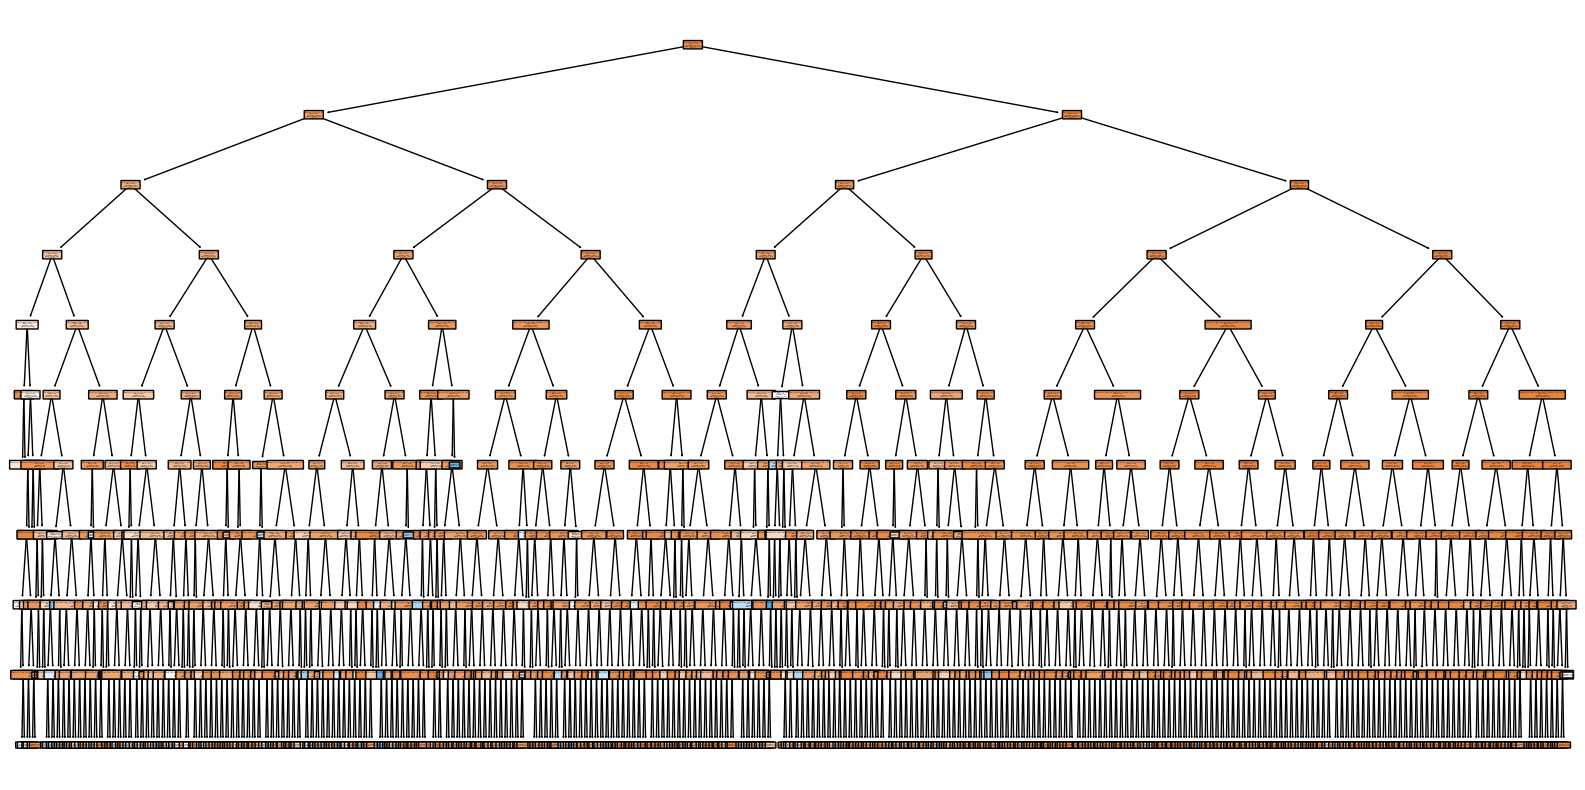

In [15]:
# plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtree_model, filled=True, rounded=True, class_names=["1", '0'], feature_names=X.columns)
plt.show()

In [23]:
# import pickle
# pickle.dump(dtree_model, open(r'C:\Users\ReinisFals\OneDrive - Peero, SIA\Desktop\Bachelors Research\Bachelors-Research\Bachelors-Playground\models\dtree_model.pkl', 'wb'))

#### 4.2.1 Decision Tree Model Fine-Tuning

In [ ]:
### Manipulating the parameters - second model
model = DecisionTreeClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# Define the parameter grid.
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, cv=cv, scoring='recall',error_score=0)
dtree_model_tuned = grid_search.fit(X_train, y_train)

In [ ]:
y_pred_dtreet = dtree_model_tuned.predict(X_test)
y_train_pred_dtreet = dtree_model_tuned.predict(X_train)

In [ ]:
dtreet_accuracy = metrics.accuracy_score(y_test, y_pred_dtreet)
print("Accuracy: {:.4%}".format(dtreet_accuracy))

#### 4.2.2 Decision Tree Model Evaluation

In [ ]:
dtree_model_tuned_f1 = f1_score(y_test, y_pred_dtreet)
dtree_model_tuned_acc = accuracy_score(y_test, y_pred_dtreet)
dtree_model_tuned_recall = recall_score(y_test, y_pred_dtreet)
dtree_model_tuned_auc = roc_auc_score(y_test, y_pred_dtreet)

print("F1 Score: {:.4%}".format(dtree_model_tuned_f1))
print("Accuracy: {:.4%}".format(dtree_model_tuned_acc))
print("Recall: {:.4%}".format(dtree_model_tuned_recall))
print("AUC: {:.4%}".format(dtree_model_tuned_auc))

In [ ]:
eval(dtree_model_tuned, X_train, X_test)

In [ ]:
dtree_model_scores = train_val(y_train, y_train_pred_dtreet, y_test, y_pred_dtreet)
dtree_model_scores

In [ ]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtreet)
roc_auc = roc_auc_score(y_test, y_pred_dtreet)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC: ", roc_auc_score(y_test, y_pred_dtreet))

In [ ]:
plt.figure(figsize=(20, 10)) 
tree_plot = plot_tree(dtree_model_tuned.best_estimator_,
                      feature_names=X_train.columns, 
                      class_names=[1, 0], 
                      filled=True)

plt.show()

### 4.3 Random Forest

**Random Forest** is a powerful ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

The fundamental concept behind Random Forest is simple yet very powerful: combine several trees into a forest (hence the name), each tree is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size $m$ (where $m$ is specified by the user). The purpose of these two sources of randomness is to decrease the variance of the forest estimator.

Each individual tree in the Random Forest gives a classification: "0" for an active employee or "1" for a terminated employee. The forest chooses the classification having the most votes (across all the trees in the forest) and this is the model's final prediction.

The mathematical representation of a Random Forest model is as follows:

$$
H(x) = \text{mode}(h(x, \Theta_1), h(x, \Theta_2), \dots, h(x, \Theta_k))
$$

where $h(x, \Theta_k)$ is the prediction of the $k$-th tree, $\Theta_k$ represents the random vector used to build the $k$-th tree, $x$ is the input feature vector, and $H$ is the final Random Forest model. The $\text{mode}$ function returns the most common prediction.

This approach of averaging or majority voting helps to reduce the variance and improve the predictive accuracy of the final model. It also helps to ensure that the model generalizes well and is not too complex.

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
rf_model = rf_model.fit(X_train, y_train)

In [17]:
y_pred_rf = rf_model.predict(X_test)
y_train_pred_rf = rf_model.predict(X_train)

In [18]:
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
print("Accuracy: {:.4%}".format(rf_accuracy))

Accuracy: 91.9594%


#### 4.3.1 Random Forest Model Fine-Tuning

In [ ]:
model = RandomForestClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
rf_model_tuned = grid_search.fit(X_train, y_train)


In [ ]:
# make predictions with the tuned model
y_pred_rft = rf_model_tuned.predict(X_test)
y_train_pred_rft = rf_model_tuned.predict(X_train)

In [ ]:
rft_accuracy = metrics.accuracy_score(y_test, y_pred_rft)
print("Accuracy: {:.4%}".format(rft_accuracy))

#### 4.3.2 Random Forest Model Evaluation

In [ ]:
rf_model_tuned_f1 = f1_score(y_test, y_pred_rft)
rf_model_tuned_acc = accuracy_score(y_test, y_pred_rft)
rf_model_tuned_recall = recall_score(y_test, y_pred_rft)
rf_model_tuned_auc = roc_auc_score(y_test, y_pred_rft)

print("F1 Score: {:.4%}".format(rf_model_tuned_f1))
print("Accuracy: {:.4%}".format(rf_model_tuned_acc))
print("Recall: {:.4%}".format(rf_model_tuned_recall))
print("AUC: {:.4%}".format(rf_model_tuned_auc))

In [ ]:
eval(rf_model_tuned, X_train, X_test)

In [ ]:
rf_model_scores = train_val(y_train, y_train_pred_rft, y_test, y_pred_rft)
rf_model_scores

In [ ]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rft)
roc_auc = roc_auc_score(y_test, y_pred_rft)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC: ", roc_auc_score(y_test, y_pred_rft))

In [ ]:
# plot the feature importance
plt.figure(figsize=(10, 10))
feat_importances = pd.Series(rf_model_tuned.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 4.4 Gradient Boosting

**Gradient Boosting** is a powerful ensemble learning method that operates by combining several weak learners (i.e., shallow decision trees) into a strong learner. It works by iteratively training a sequence of weak learners on the residuals of the previous weak learners. The final prediction is obtained by summing the predictions of all the weak learners.

The mathematical representation of a Gradient Boosting model is as follows:

$$
H(x) = \sum_{k=1}^K h_k(x)
$$

where $h_k(x)$ is the prediction of the $k$-th weak learner and $H$ is the final Gradient Boosting model.

In [19]:
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
gb_model = gb_model.fit(X_train, y_train)

In [20]:
# make predictions
y_pred_gb = gb_model.predict(X_test)
y_train_pred_gb = gb_model.predict(X_train)

In [21]:
gb_accuracy = metrics.accuracy_score(y_test, y_pred_gb)
print("Accuracy: {:.4%}".format(gb_accuracy))

Accuracy: 92.0561%


#### 4.4.1 Gradient Boosting Model Fine-Tuning

In [ ]:
model = GradientBoostingClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 200],
    'subsample': [0.5, 1.0],
    'max_depth': [3, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
gb_model_tuned = grid_search.fit(X_train, y_train)

In [ ]:
y_pred_gbt = gb_model_tuned.predict(X_test)
y_train_pred_gbt = gb_model_tuned.predict(X_train)

In [ ]:
gbt_accuracy = metrics.accuracy_score(y_test, y_pred_gbt)
print("Accuracy: {:.4%}".format(gbt_accuracy))

#### 4.4.2 Gradient Boosting Model Evaluation

In [ ]:
gbt_model_tuned_f1 = f1_score(y_test, y_pred_gbt)
gbt_model_tuned_acc = accuracy_score(y_test, y_pred_gbt)
gbt_model_tuned_recall = recall_score(y_test, y_pred_gbt)
gbt_model_tuned_auc = roc_auc_score(y_test, y_pred_gbt)

print("F1 Score: {:.4%}".format(gbt_model_tuned_f1))
print("Accuracy: {:.4%}".format(gbt_model_tuned_acc))
print("Recall: {:.4%}".format(gbt_model_tuned_recall))
print("AUC: {:.4%}".format(gbt_model_tuned_auc))

In [ ]:
eval(gb_model_tuned, X_train, X_test)

In [ ]:
gb_model_scores = train_val(y_train, y_train_pred_gbt, y_test, y_pred_gbt)
gb_model_scores

In [ ]:
# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbt)
roc_auc = roc_auc_score(y_test, y_pred_gbt)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC: ", roc_auc_score(y_test, y_pred_gbt))

In [ ]:
# plot the feature importance
plt.figure(figsize=(10, 10))
feat_importances = pd.Series(gb_model_tuned.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()